<a href="https://colab.research.google.com/github/MiguelAngelTinocoArroyo/MNIST/blob/main/Source/MNIST_keras_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

# Librería del dataset
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Librería
import keras 
import tensorflow_datasets as tfd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten, Dropout

In [ ]:
! pip install keras-rectified-adam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.20.0-py3-none-any.whl size=8270 sha256=17df6ee7e13b7cd79f7fcb8a5089f72cdc6a8e03c7184ffd67f370f160fc47d3
  Stored in directory: /root/.cache/pip/wheels/5d/1f/40/3fe78c6f4dd6f0522c558077283361e7d50fd7720d2f8fcd7e
Successfully built keras-rectified-adam


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargamos la data
digits = datasets.load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

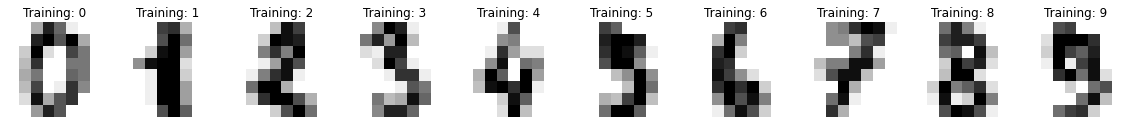

In [ ]:
# Mostrar todo el conjunto de Dataset del 0 al 9

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# guardamos los datos matriciales 
dataMnist = digits.data

In [ ]:
# Veamos la dimensión de nuestro dataset
dataMnist.shape

(1797, 64)

In [ ]:
# Separación en entrenamiento y test=30%
X_train, X_test, y_train, y_test =  train_test_split(
    dataMnist, digits.target, test_size=0.3)

# Dimensión de train y test
print('train X :', X_train.shape, ', train y :', y_train.shape)
print('test  X :', X_test.shape, ', test  y :', y_test.shape)

train X : (1257, 64) , train y : (1257,)
test  X : (540, 64) , test  y : (540,)


In [ ]:
# reshape
img_rows, img_cols = 8, 8

input_shape = (img_rows, img_cols, 1)
input_shape

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [ ]:
# Normalizamos los datos para evitar problemas de inestabilidad numérica
# Aseguramos que los datos estén bien representados con floats de 32-bits
# los pixeles tiene valores de 0 a 255, pero para normalizar deben estar
# entre 0 a 1 
X_train = X_train.astype('float32')/255.0 # 255 es el máx valor de pixeles
X_test  = X_test.astype('float32')/255.0  # de color

In [ ]:
# Convertir las etiquetas en vectores one-hot encoded
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test  = label_binarizer.fit_transform(y_test)

In [ ]:
#atch_size = 256
num_classes = 10
#epochs = 50

input_shape = input_shape

modelo_cnn = Sequential()
# conv2D convierte a un vector toda la información de los pixeles
# flatten sirve para conectar una capa de convolución bidimensional a una 
# capa densa unimensional 
# MaxPooling2D aplicar poling
# 32 filtros, kernel 3*3

modelo_cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# De una capa 2*2 tomará el valor del pixel máximo poling
modelo_cnn.add(MaxPooling2D(pool_size=(2, 2)))
modelo_cnn.add(Dropout(0.25))
modelo_cnn.add(Flatten())
modelo_cnn.add(Dense(256, activation='relu'))
modelo_cnn.add(Dropout(0.5))
modelo_cnn.add(Dense(num_classes, activation='softmax'))
modelo_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               73984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
# Usamos Adam como optimizador 
print('Entrenando red...')
adam = Adam()
modelo_cnn.compile(loss ='categorical_crossentropy', 
              optimizer = 'adam', metrics=['accuracy'])

Entrenando red...


In [ ]:
print('train X :', X_train.shape, ', train y :', y_train.shape)
print('test  X :', X_test.shape, ', test  y :', y_test.shape)

train X : (1257, 8, 8, 1) , train y : (1257, 10)
test  X : (540, 8, 8, 1) , test  y : (540, 10)


In [ ]:
prede_test = modelo_cnn.fit(X_train, y_train,validation_data=(X_test, y_test),
              epochs = 130, batch_size= 100)

Epoch 1/130
13/13 [==============================] - 1s 24ms/step - loss: 2.2963 - accuracy: 0.1782 - val_loss: 2.2854 - val_accuracy: 0.2741
Epoch 2/130
13/13 [==============================] - 0s 15ms/step - loss: 2.2763 - accuracy: 0.2697 - val_loss: 2.2576 - val_accuracy: 0.4500
Epoch 3/130
13/13 [==============================] - 0s 14ms/step - loss: 2.2441 - accuracy: 0.3842 - val_loss: 2.2130 - val_accuracy: 0.5870
Epoch 4/130
13/13 [==============================] - 0s 10ms/step - loss: 2.1891 - accuracy: 0.4654 - val_loss: 2.1419 - val_accuracy: 0.7963
Epoch 5/130
13/13 [==============================] - 0s 10ms/step - loss: 2.1114 - accuracy: 0.5903 - val_loss: 2.0367 - val_accuracy: 0.8000
Epoch 6/130
13/13 [==============================] - 0s 10ms/step - loss: 1.9921 - accuracy: 0.6476 - val_loss: 1.8897 - val_accuracy: 0.8278
Epoch 7/130
13/13 [==============================] - 0s 9ms/step - loss: 1.8548 - accuracy: 0.6523 - val_loss: 1.7062 - val_accuracy: 0.8333
Epoch 8

In [ ]:
def plot_history_loss_and_acc(history_keras_nn):

    fig, axs = plt.subplots(1,2, figsize=(12,4))

    axs[0].plot(history_keras_nn.history['loss'])
    axs[0].plot(history_keras_nn.history['val_loss'])
    axs[0].set_title('model loss')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'validation'], loc='upper left')

    axs[1].plot(history_keras_nn.history['accuracy'])
    axs[1].plot(history_keras_nn.history['val_accuracy'])
    axs[1].set_title('model accuracy')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'validation'], loc='upper left')

    plt.show()

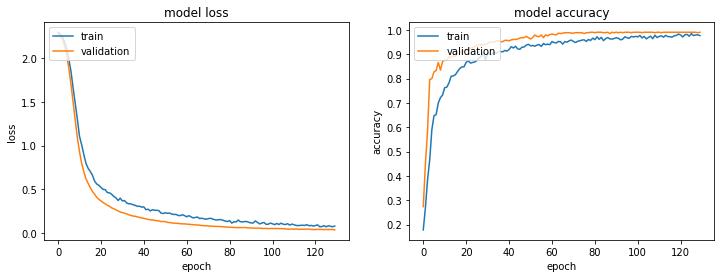

In [ ]:
plot_history_loss_and_acc(prede_test)

In [ ]:
from sklearn.metrics import classification_report
 
predictions = modelo_cnn.predict(X_test, batch_size = 64)
clas = classification_report(y_test.argmax(axis=1),
                  predictions.argmax(axis=1),
                  target_names=[str(x) for x in label_binarizer.classes_])
print(clas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        58
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        48
           4       0.98      1.00      0.99        58
           5       1.00      0.98      0.99        53
           6       0.98      1.00      0.99        60
           7       0.98      0.98      0.98        58
           8       1.00      0.96      0.98        51
           9       0.98      1.00      0.99        52

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

